1. Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.


### Main objective of the analysis and brief description of the dataset

The main objective of this analysis is to predict whether the image is a dog or a cat. The dataset is from Kaggle competition. The dataset contains 25000 images of dogs and cats. The dataset is divided into train and test set. The train set contains 12500 images of dogs and cats. The test set contains also 12500 images. The images are colored and have different sizes. 

The dataset have only two classes: dogs and cats. the csv file contains the labels and id of the images. The labels are 0 for cats and 1 for dogs.

In [3]:
#Deep learning and Reinforcement learning for image classification
## dataset: https://www.kaggle.com/c/dogs-vs-cats/data

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras import optimizers, regularizers, models, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as kimage
from keras.applications import VGG16
from keras.models import load_model,Sequential


# unzip the dataset if not done already
import zipfile
if not os.path.exists('./training'):
    with zipfile.ZipFile('./train.zip','r') as z:
        z.extractall('./training')
    with zipfile.ZipFile('./test1.zip','r') as z:
        z.extractall('./testing')


base_dir = './'
train_dir = os.path.join(base_dir, 'training/train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'testing/test1')

2. Brief summary of data exploration and actions taken for data cleaning or feature engineering.

### Organization of the dataset

#### As we can see in the following figure, the images in the dataset have different sizes. The dogs and cats are in different positions in the images. The images are colored.

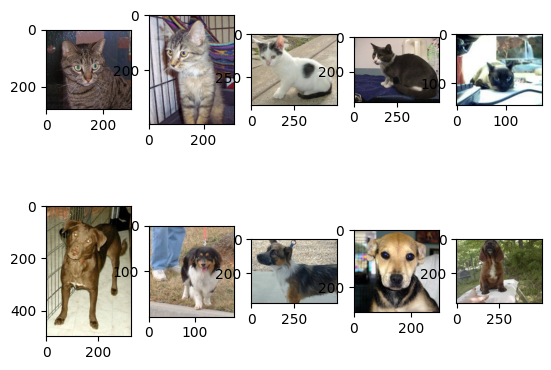

In [4]:
fnames = ['cats/cat.1.jpg', 'cats/cat.2.jpg', 'cats/cat.3.jpg', 'cats/cat.4.jpg', 'cats/cat.5.jpg',
            'dogs/dog.1.jpg', 'dogs/dog.2.jpg', 'dogs/dog.3.jpg', 'dogs/dog.4.jpg', 'dogs/dog.5.jpg']
fnames = [os.path.join(train_dir, fname) for fname in fnames]

plots = plt.subplots(2,5)
for i, img_path in enumerate(fnames):
    plt.subplot(2,5,i+1)
    image = plt.imread(img_path)
    plt.imshow(image)

plt.show()



#### For the first step, we will create the directories for the train and test set. Then we will create the directories for the dogs and cats in the train and test set. Finally, we will move the images to the corresponding directories.

#### After that, we will resize the images to 150x150 pixels. We will also normalize the images by dividing the pixels by 255.

In [74]:

original_dataset_dir = './training/train'
train_cats_dir = './training/train/cats'
train_dogs_dir = './training/train/dogs'
valid_dir = './validation'
valid_cats_dir = './validation/cats'
valid_dogs_dir = './validation/dogs'
test_dir = './testing/test1'
test_cats_dir = './testing/test1/cats'
test_dogs_dir = './testing/test1/dogs'

for dir in [train_cats_dir, train_dogs_dir, valid_cats_dir, valid_dogs_dir, test_cats_dir, test_dogs_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)
        



fnames = ['cat.{}.jpg'.format(i) for i in range(10001)] #Move 10,000 cat images from the original dataset to the train cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir , fname)
  dst = os.path.join(train_cats_dir , fname)
  os.rename(src,dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(10001,11251)] #Move 1250 cat images from the original dataset to the validation cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir , fname)
  dst = os.path.join(valid_cats_dir , fname)
  os.rename(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(11251,12500)] #Move 1250 cat images from the original dataset to the test cat directory
for fname in fnames:
  src= os.path.join(original_dataset_dir , fname)
  dst= os.path.join(test_cats_dir, fname)
  os.rename(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10001)] #Move 10,000 dog images from the original dataset to the train cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir , fname)
  dst = os.path.join(train_dogs_dir ,fname)
  os.rename(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10001,11251)] #Move 1250 dog images from the original dataset to the validation cat directory
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(valid_dogs_dir , fname)
  os.rename(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(11251,12500)]#Move 1250 dog images from the original dataset to the test cat directory
for fname in fnames:
  src= os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir , fname)
  os.rename(src,dst)

In [5]:

#rescale images to 0-1 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
img_ratio = (150,150)
# if 'validation' not in os.listdir(base_dir):
#     os.mkdir(validation_dir)

# #move 2500 images to validation set 
# if 'cat.1000.jpg' not in os.listdir(validation_dir):
#     fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
#     fnames.extend(['dog.{}.jpg'.format(i) for i in range(1000,1500)])
#     for fname in fnames:
#         src = os.path.join(train_dir, fname)
#         dst = os.path.join(validation_dir, fname)
#         os.rename(src, dst)


#read images from directories and convert them to float32 tensors
train_generator = train_datagen.flow_from_directory( 
    train_dir,
    target_size=img_ratio,
    color_mode='rgb',
    shuffle=True,
    batch_size=20,
    class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=img_ratio,
    color_mode='rgb',
    shuffle=True,
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir , target_size = img_ratio , class_mode = 'binary' , 
                                       color_mode = 'rgb' , shuffle = False , batch_size = 32)


Found 20002 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


4. Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.

>#### After resizing the images, we will build the model. With the model, we will predict the labels of the test set. We will use CNN model. We will use EfficientNetB5 model for fine tunning. Also a BatchNormalization layer and a Dropout layer will be added to the model. We will use the Adam optimizer and the loss function will be binary_crossentropy.
>
>#### Also, we will also use clustering techniques to see if we can improve the accuracy of the model. We will use KMeans and DBSCAN clustering techniques. also we will tune the hyperparameters of the model to see if we can improve the accuracy of the model.



In [6]:
#build the model that will be trained on the data
from keras import applications
base_model = applications.EfficientNetB5(weights='imagenet', include_top=False, input_shape=(150,150,3),pooling= 'max') 
base_model.trainable = False #freeze the base model

model = models.Sequential() #sequential model
model.add(base_model) #add base model to the sequential model
model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)) #batch normalization layer
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.006), activation='relu')) #dense layer
model.add(layers.Dropout(0.5, seed=42)) #dropout layer
model.add(layers.Dense(1, activation='sigmoid')) #dense layer


model.summary() #print summary of model



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 2048)              28513527  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 29046520 (110.80 MB)
Trainable params: 

### After the building of the model, its time to compile it. We will use the following parameters:

> - loss='binary_crossentropy'
> - optimizer=Adamax(lr=0.001)
> - metrics=['acc']

### After compiling the model, we will fit the model with the train set. We will use the following parameters:

> - epochs=10
> - steps_per_epoch=100
> - validation_steps=None
> - validation_data=validation_generator






In [64]:
#compile the model
model.compile(optimizer=optimizers.Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc']) #compile the model


# train the model with 10 epochs
history = model.fit(x= train_generator , validation_data= validation_generator , epochs= 10 , verbose = 1,steps_per_epoch=100, validation_steps = None , shuffle = False)




#evaluate the model
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(test_generator)
validation_loss, validation_acc = model.evaluate(validation_generator)

print('train_acc:', train_acc)
print('test_acc:', test_acc)
print('validation_acc:', validation_acc)


 
# #save the model
model.save('cats_and_dogs_small_1.h5') 




Epoch 1/10
100/100 [==============================] - 202s 2s/step - loss: 25.5682 - acc: 0.9610 - val_loss: 17.5733 - val_acc: 0.9688
Epoch 2/10
100/100 [==============================] - 201s 2s/step - loss: 14.4197 - acc: 0.9430 - val_loss: 11.5352 - val_acc: 0.9728
Epoch 3/10
100/100 [==============================] - 222s 2s/step - loss: 9.7638 - acc: 0.9590 - val_loss: 8.0715 - val_acc: 0.9724
Epoch 4/10
100/100 [==============================] - 189s 2s/step - loss: 7.0431 - acc: 0.9540 - val_loss: 5.9250 - val_acc: 0.9772
Epoch 5/10
100/100 [==============================] - 194s 2s/step - loss: 5.2420 - acc: 0.9590 - val_loss: 4.4737 - val_acc: 0.9768
Epoch 6/10
100/100 [==============================] - 194s 2s/step - loss: 4.0367 - acc: 0.9530 - val_loss: 3.4720 - val_acc: 0.9768
Epoch 7/10
100/100 [==============================] - 192s 2s/step - loss: 3.1690 - acc: 0.9575 - val_loss: 2.7334 - val_acc: 0.9792
Epoch 8/10
100/100 [==============================] - 194s 2s/ste

c:\Users\caio-\Documents\ml\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### After fitting the model, we will plot the accuracy and loss of the model. 

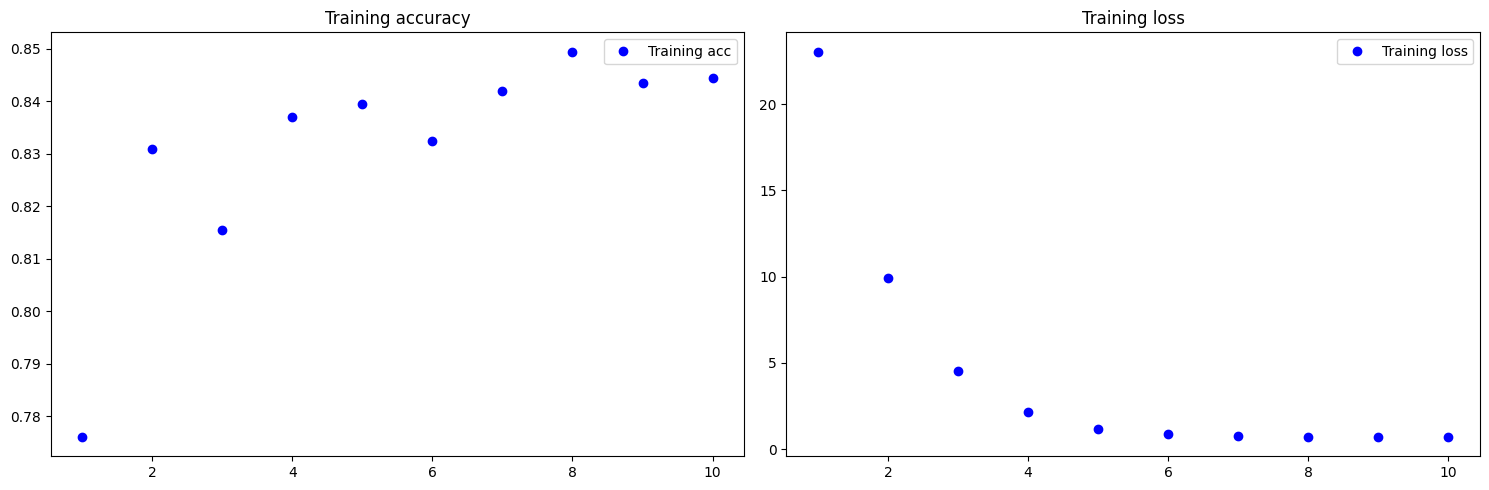

In [40]:
def plot_graphs():
    acc = history.history['acc']
    loss=history.history['loss']

    epochs = range(1, len(acc)+1)
    fig, ax = plt.subplots(1, 2, figsize=(15,5))


    ax[0].plot(epochs, acc, 'bo', label='Training acc')
    ax[0].set_title('Training accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training loss')
    ax[1].set_title('Training loss')
    ax[1].legend()

    fig.tight_layout()
    plt.show()

plot_graphs()

>### As we can see in the following figure, the accuracy of the model is averaging 95% for all the epochs. The loss of the model has a decreasing trend, starting from 25 and ending to 1.7.

>### Now, we will use the model to predict the labels of the test set. 

In [71]:
pred = model.predict(test_generator)
predicted_classes = (pred > 0.5).astype(int)

79/79 [==============================] - 110s 1s/step


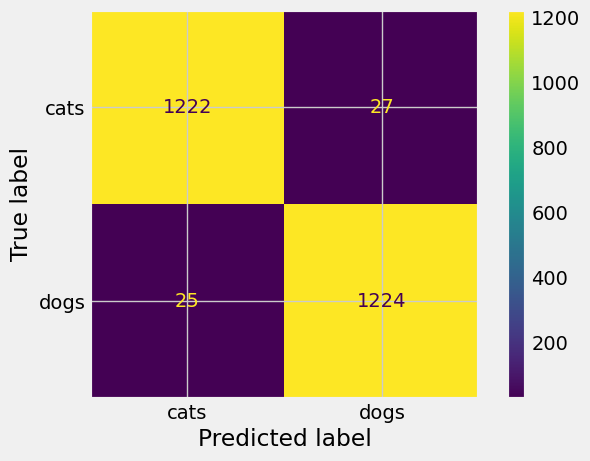

In [72]:
# Get the true labels from the generator
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


true_classes = test_generator.classes

# Calculate the confusion matrix
confusion = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=test_generator.class_indices)
disp.plot(cmap='viridis', values_format='d')

In [43]:
from sklearn.metrics import classification_report


classification_rep = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

        cats       0.98      0.98      0.98      1249
        dogs       0.98      0.98      0.98      1249

    accuracy                           0.98      2498
   macro avg       0.98      0.98      0.98      2498
weighted avg       0.98      0.98      0.98      2498



### As we can see in the following figure, the model has an accuracy of 98% for the test set. This means that the model is not overfitting.


#### We will now try to build the model using VGG16 model instead of EfficientNetB5 model, to see if we can improve the accuracy of the model.

In [37]:

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3),pooling= 'max')
conv_base.trainable = False #freeze the base model

model = models.Sequential() #sequential model
model.add(conv_base) #add base model to the sequential model
model.add(layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)) #batch normalization layer
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.006), activation='relu')) #dense layer
model.add(layers.Dropout(0.5, seed=42)) #dropout layer
model.add(layers.Dense(1, activation='sigmoid')) #dense layer


model.summary() 





Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_54 (Dense)            (None, 1)                 257       
                                                                 
Total params: 14848321 (56.64 MB)
Trainable params: 132609 (518.00 KB)
Non-trainable params: 14715712 (56.14 MB)
______

In [38]:
#compile the model
model.compile(optimizer=optimizers.Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc']) #compile the model


# train the model with 10 epochs
history = model.fit(x= train_generator , validation_data= validation_generator , epochs= 10 , verbose = 1,steps_per_epoch=100, validation_steps = None , shuffle = False)


train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(test_generator)
validation_loss, validation_acc = model.evaluate(validation_generator)

print('train_acc:', train_acc)
print('test_acc:', test_acc)
print('validation_acc:', validation_acc)


 
# #save the model
model.save('cats_and_dogs_small_2.h5') 


Epoch 1/10



100/100 [==============================] - 126s 1s/step - loss: 23.0485 - acc: 0.7760 - val_loss: 14.3757 - val_acc: 0.8464
Epoch 2/10
100/100 [==============================] - 129s 1s/step - loss: 9.8977 - acc: 0.8310 - val_loss: 6.4780 - val_acc: 0.8636
Epoch 3/10
100/100 [==============================] - 128s 1s/step - loss: 4.5570 - acc: 0.8155 - val_loss: 2.9898 - val_acc: 0.8580
Epoch 4/10
100/100 [==============================] - 122s 1s/step - loss: 2.1361 - acc: 0.8370 - val_loss: 1.4677 - val_acc: 0.8632
Epoch 5/10
100/100 [==============================] - 125s 1s/step - loss: 1.1653 - acc: 0.8395 - val_loss: 0.9194 - val_acc: 0.8460
Epoch 6/10
100/100 [==============================] - 120s 1s/step - loss: 0.8521 - acc: 0.8325 - val_loss: 0.7749 - val_acc: 0.8376
Epoch 7/10
100/100 [==============================] - 115s 1s/step - loss: 0.7548 - acc: 0.8420 - val_loss: 0.7288 - val_acc: 0.8616
Epoch 8/10
100/100 [==============================] - 116s 1s/step - loss: 0.7

c:\Users\caio-\Documents\ml\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


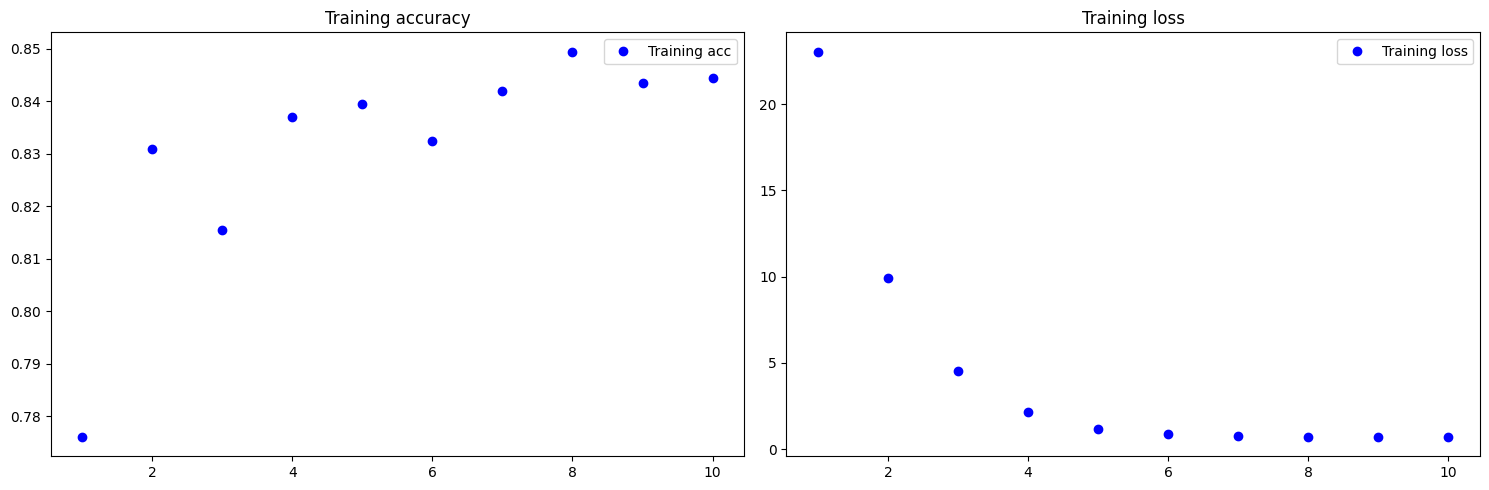

In [41]:
plot_graphs()

### In the graph we can see that the accuracy of the model is averaging 0.84% to this model. The behavior of the loss is the same as the previous model.

In [44]:
pred = model.predict(test_generator)
predicted_classes = (pred > 0.5).astype(int)

true_classes = test_generator.classes


classification_rep = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices)
print("\nClassification Report:")
print(classification_rep)


79/79 [==============================] - 69s 870ms/step

Classification Report:
              precision    recall  f1-score   support

        cats       0.83      0.91      0.87      1249
        dogs       0.90      0.81      0.85      1249

    accuracy                           0.86      2498
   macro avg       0.87      0.86      0.86      2498
weighted avg       0.87      0.86      0.86      2498



### The classification report of the model show that his accuracy is 0.86% and the f1-score is 0.86%. Compared to the previous model, the accuracy and the f1-score are lower.

5. A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.

6. Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

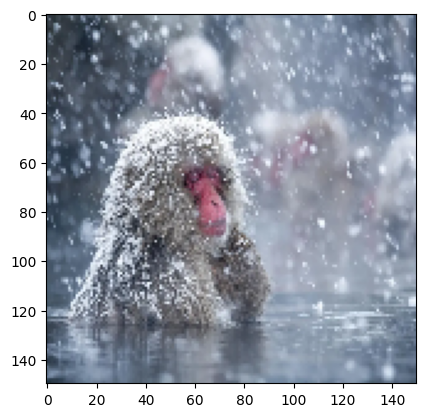

1/1 [==============================] - 0s 79ms/step
[[0.50187784]]
[0.50187784]
0.50187784
dog
precisao:  50.18778443336487 %


In [46]:
img_path = './snow_monkey.png'

img = kimage.load_img(img_path, target_size=(150, 150))
img_tensor = kimage.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()


pred = model.predict(img_tensor)
print(pred)
print(pred[0])
print(pred[0][0])

if pred[0][0] > 0.5:
    print("dog")
else:
    print("cat")

print("precisao: ", pred[0][0]*100, "%")

### Conclusion

#### Using the CNN model, we can predict the labels of the images with an accuracy of 98%, which is a very good accuracy. The use of EfficientNetB5 model for fine tunning, BatchNormalization layer and Dropout layer improved the accuracy of the model. The main finding of this analysis is the ideal sequential params for the model, which are the following:

> - BatchNormalization layer
> - Dropout layer
> - EfficientNetB5 model for fine tunning
> - Adamax optimizer

#### Testing with VGG16 model, we can see that the accuracy of the model is lower than the previous model. This means that the previous model is better than this model.

#### For the next steps, we can explore the items:

1. Optimizer and Loss Function Exploration:
Experiment with different optimizers (e.g., SGD, RMSprop, etc.) and loss functions (e.g., categorical crossentropy, sparse categorical crossentropy) to identify combinations that may lead to improved convergence and generalization.
2. Hyperparameter Tuning:
Conduct a systematic hyperparameter tuning process. Adjust parameters such as learning rates, batch sizes, and the number of epochs to find optimal settings that maximize model performance.
3. Data Augmentation:
Implement data augmentation techniques during training to artificially increase the diversity of the training dataset. This can include random rotations, flips, zooms, and other transformations to improve the model's ability to generalize to variations in the input data.

